 40%|███▉      | 397/1000 [00:55<01:32,  6.54it/s]

Test failed for points: (0.15799077368578862, 0.5524115116316632), ((-0.5335680674207515, 0.2703292552733403)), ((0.094451149573616, -0.061053730877535184)), ((0.06745177249831347, 0.515224344749355))
Brute force: True, Exact: False


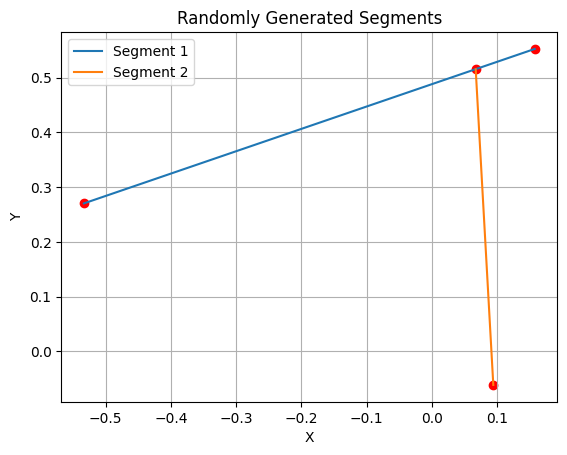

100%|██████████| 1000/1000 [02:19<00:00,  7.19it/s]

All tests passed!
Tested 1000 total random segments, 247 of them did intersect.


In [3]:
import random
import matplotlib.pyplot as plt
from math import dist
from tqdm import tqdm
from CVRPSolver.CVRP.heuristics import do_intersect


def generate_random_point():
    return random.uniform(-1, 1), random.uniform(-1, 1)

def generate_points_on_segment(px, py, qx, qy, num_points=1000):
    points = []
    for i in range(num_points + 1):
        t = i / num_points
        x = px + t * (qx - px)
        y = py + t * (qy - py)
        points.append((x, y))
    return points

def brute_force_intersect(p1x, p1y, q1x, q1y, p2x, p2y, q2x, q2y, threshold=1e-3):
    segment1_points = generate_points_on_segment(p1x, p1y, q1x, q1y)
    segment2_points = generate_points_on_segment(p2x, p2y, q2x, q2y)
    
    for (sx, sy) in segment1_points:
        for (tx, ty) in segment2_points:
            if dist((sx, sy), (tx, ty)) < threshold:
                return True
    return False

def plot_segments(p1x, p1y, q1x, q1y, p2x, p2y, q2x, q2y):
    plt.figure()
    plt.plot([p1x, q1x], [p1y, q1y], label='Segment 1')
    plt.plot([p2x, q2x], [p2y, q2y], label='Segment 2')
    plt.scatter([p1x, q1x, p2x, q2x], [p1y, q1y, p2y, q2y], color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Randomly Generated Segments')
    plt.grid(True)
    plt.show()

def test_intersection():
    c = 0
    total = 1000
    for _ in tqdm(range(total)):  # Run 1000 random tests
        p1x, p1y = generate_random_point()
        q1x, q1y = generate_random_point()
        p2x, p2y = generate_random_point()
        q2x, q2y = generate_random_point()
        
        result_exact = do_intersect(p1x, p1y, q1x, q1y, p2x, p2y, q2x, q2y)
        result_brute_force = brute_force_intersect(p1x, p1y, q1x, q1y, p2x, p2y, q2x, q2y)
        
        c += result_exact
        if not result_exact == result_brute_force:
            print(f"Test failed for points: ({p1x}, {p1y}), ({q1x, q1y}), ({p2x, p2y}), ({q2x, q2y})")
            print(f"Brute force: {result_brute_force}, Exact: {result_exact}")
            plot_segments(p1x, p1y, q1x, q1y, p2x, p2y, q2x, q2y)

    print("All tests passed!")
    print(f"Tested {total} total random segments, {c} of them did intersect.")

# Run the test
test_intersection()
